In [ ]:
###Inportant libraries and Packages needed to install###
'''PLEASE RUN THIS CELL FIRST'''
!pip install matplotlib pylatexenc
!pip install qiskit
!pip install qiskit-aer

  Using cached pylatexenc-2.10-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: pylatexenc
    Found existing installation: pylatexenc 2.10


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
^C


Use Quirk for visualization of circuits!

https://algassert.com/quirk#circuit={%22cols%22:[[1,%22H%22],[1,%22%E2%80%A2%22,1,1,%22X%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,1,1,%22%E2%80%A6%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,1,1,%22%E2%80%A6%22],[%22~87lj%22],[%22Bloch%22],[%22%E2%80%A2%22,%22X%22],[%22H%22],[%22Measure%22,%22Measure%22],[1,%22%E2%80%A2%22,1,1,%22X%22],[%22%E2%80%A2%22,1,1,1,%22Z%22],[1,1,1,1,%22Bloch%22],[1,1,1,1,%22~f7c0%22]],%22gates%22:[{%22id%22:%22~87lj%22,%22name%22:%22message%22,%22circuit%22:{%22cols%22:[[%22e^-iYt%22],[%22X^t%22]]}},{%22id%22:%22~f7c0%22,%22name%22:%22received%22,%22matrix%22:%22{{1,0},{0,1}}%22}]}

# Deutsche algorithm

In the following section you will build your own Deutsch algorithm for finding the parity of the black box function

f(x) = x.

Code in the given template, build your own oracle and assemble a circuit.

Run the whole module to get outcomes.

=== Deutsch Algorithm Workshop Report ===
Quantum counts: {'1': 1024}
Quantum classification: balanced
Classical evaluation: {'classification': 'balanced', 'queries_used': 2, 'outputs': (0, 1)}
Quantum queries used: 1 oracle call
Classical queries used: 2
Verification: Quantum and classical classifications agree.

Circuit diagram:


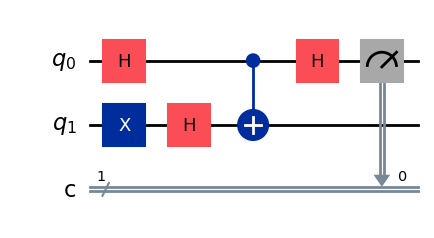

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from typing import Callable, Dict
from IPython.display import display




## In the followng tasks you will construct your own Deutsch Algorithm for this blackbox##
def deutsch_function(x):
    return x




## TASK 1: Build the oracle circuit U_f based on f(x).
def construct_deutsch_oracle() -> QuantumCircuit:
    oracle = QuantumCircuit(2, name="U_f")
    ## TODO: Implement the oracle U_f for your chosen f(x). ##
    ## Code here ##
    oracle.cx(0, 1)



    return oracle


## TASK 2: Assemble the Deutsch circuit using your oracle.
def deutsch_algorithm(oracle: QuantumCircuit) -> QuantumCircuit:
    circuit = QuantumCircuit(2, 1)  # 2 qubits, 1 classical bit for measurement.
    ## TODO: Build the Deutsch algorithm circuit.##
        # use circuit.compose(oracle, qubits=[0, 1], inplace=True) to embed the oracle in your circuit!
    ## Code here ##
    circuit.x(1)  # Prepare |1> in the auxiliary qubit.
    circuit.h([0, 1])  # Put both qubits into superposition.

    circuit.compose(oracle, qubits=[0, 1], inplace=True)

    circuit.h(0)  # Interfere the query qubit to reveal f's parity.
    circuit.measure(0, 0)  # Measure the first qubit only; 0 -> constant, 1 -> balanced.
    return circuit




## Run the whole module to see your work! ##




####################### DON'T MODIFY ANYTHING BELOW THIS LINE #########################
def run_deutsch_circuit(circuit: QuantumCircuit, shots: int = 1024) -> Dict[str, int]:
    """Run the Deutsch circuit and return measurement counts."""
    simulator = AerSimulator()
    compiled = transpile(circuit, simulator)
    job = simulator.run(compiled, shots=shots)
    result = job.result()
    return result.get_counts()

def interpret_deutsch_result(counts: Dict[str, int]) -> str:
    """Return 'constant' or 'balanced' based on the most frequent outcome."""
    measured_bit = max(counts, key=counts.get)
    return "constant" if measured_bit == "0" else "balanced"

def classical_deutsch_check(f: Callable[[int], int]) -> Dict[str, int]:
    """Return counts of outputs for classical evaluation along with query cost."""
    f0 = f(0)
    f1 = f(1)
    label = "constant" if f0 == f1 else "balanced"
    return {"classification": label, "queries_used": 2, "outputs": (f0, f1)}

def run_workshop_demo() -> None:
    oracle = construct_deutsch_oracle()
    deutsch_circuit = deutsch_algorithm(oracle)

    counts = run_deutsch_circuit(deutsch_circuit)
    classification = interpret_deutsch_result(counts)

    classical_result = classical_deutsch_check(deutsch_function)

    print("=== Deutsch Algorithm Workshop Report ===")
    print("Quantum counts:", counts)
    print("Quantum classification:", classification)
    print("Classical evaluation:", classical_result)
    print("Quantum queries used: 1 oracle call")
    print("Classical queries used:", classical_result["queries_used"])

    if classification == classical_result["classification"]:
        print("Verification: Quantum and classical classifications agree.")
    else:
        print("Warning: The oracle implementation or function definition might be inconsistent.")

    print("\nCircuit diagram:")
    display(deutsch_circuit.draw('mpl'))

if __name__ == "__main__":
    run_workshop_demo()


ANSWER KEY


```
    oracle.cx(0, 1)

```

```
    circuit.x(1)  # Prepare |1> in the auxiliary qubit.
    circuit.h([0, 1])  # Put both qubits into superposition.

    circuit.compose(oracle, qubits=[0, 1], inplace=True)

    circuit.h(0)  # Interfere the query qubit to reveal f's parity.
    circuit.measure(0, 0)  # Measure the first qubit only; 0 -> constant, 1 -> balanced.
    return circuit
```

# Deutsche Jozsa algorithm

In the following section you will build your own Deutsch Jozsa algorithm for finding the parity of the black box function

f: {0,1}^n -> {0,1}

s.t.

f(x) = 1 if even digit in bitstring are 0;
  
f(x) = 0 if odd digit in bitstring are 0.

the function is either constant (0 on all inputs or 1 on all inputs) or balanced (1 for exactly half of the input domain and 0 for the other half)

Code in the given template, build your own oracle and assemble a circuit.

Run the whole module to get outcomes.

=== Deutsch-Jozsa Algorithm Workshop Report ===
Quantum counts: {'111': 1024}
Quantum classification: balanced
Classical evaluation: {'classification': 'balanced', 'queries_used': 8, 'truth_table': {'000': 0, '001': 1, '010': 1, '011': 0, '100': 1, '101': 0, '110': 0, '111': 1}}
Quantum queries used: 1 oracle call
Classical queries used (deterministic worst-case): 8
Verification: Quantum and classical classifications agree.

Circuit diagram:


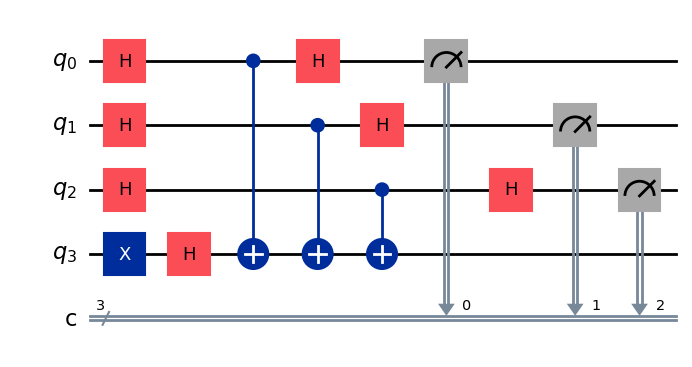

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from typing import Dict, List
from IPython.display import display
n = 3  # >=1. Increase this to see how the speed-up scales (not included in tasks).
oracle_type = "balanced_parity"  # Options: "constant_zero", "constant_one", "balanced_parity"
parity_controls: List[int] = [0, 1, 2] # Which input qubits participate when oracle_type is balanced.



######################### DON'T MODIFY ANYTHING ABOVE #################################
## In this section you will construct your own Deutsch Josza algorithm for this blackbox##
def oracle_function(bitstring: str) -> int:
    if oracle_type == "constant_zero":
        return 0
    if oracle_type == "constant_one":
        return 1
    if oracle_type == "balanced_parity":
        chosen_bits = [int(bitstring[index]) for index in parity_controls]
        ## Parity example: returns 1 for an odd number of selected 1s.
        return sum(chosen_bits) % 2



## TASK 3: Build the oracle circuit U_f that flips the output qubit based on f(x).
def build_oracle(input_size: int) -> QuantumCircuit:
    oracle = QuantumCircuit(input_size + 1, name="U_f")
    ## TODO: Build the Deutsch Josza Oracle circuit.##



    if oracle_type == "constant_zero":
      # Case f(x) = 0 for all x.
      # Then y → y ⊕ f(x) = y ⊕ 0 = y, so U_f is the identity.
      # We deliberately do nothing in this branch: the identity unitary
      # on the whole register is represented by an empty circuit.
      ## Code here ##



      pass




    elif oracle_type == "constant_one":
      # Case f(x) = 1 for all x.
      # Then y → y ⊕ 1, independent of x, which is exactly an X gate
      # on the output qubit.
      ## Code here ##
      pass









    elif oracle_type == "balanced_parity":
      # Balanced case: f(x) is the parity of a chosen subset of input bits.
      # The indices of the input qubits that participate in the parity
      # are stored in the global list parity_controls.
      # To reproduce y → y ⊕ f(x) coherently on a quantum state, we apply
      # a CNOT from each control qubit i ∈ parity_controls to the output
      # qubit. Each control contributes an XOR with its value, so the net
      # effect on y is:
      #   y ⊕ x_{i1} ⊕ x_{i2} ⊕ ... ⊕ x_{ik},
      # which equals y ⊕ f(x) for the parity function.
      ## Code here ##
      pass






    return oracle








## TASK 4: Assemble the Deutsch-Jozsa circuit using your oracle.
def build_deutsch_jozsa_circuit(oracle: QuantumCircuit) -> QuantumCircuit:
    circuit = QuantumCircuit(n + 1, n)
    ancilla = n
    ## TODO: Build the Deutsch Josza algorithm circuit.##
    ## Code here ##


    # Step 1: Initialise the state |0⟩^{⊗ n} |1⟩.
    # By default all qubits start in |0⟩, so we only need to flip the ancilla.


    # Step 2: Apply Hadamard gates H to all n + 1 qubits.
    # This creates a uniform superposition over all input strings x
    # and puts the ancilla into (|0⟩ - |1⟩)/√2.


    # Step 3: Apply the oracle U_f on all qubits.
    # The oracle is defined on the same ordering [0, 1, ..., n].


    # Step 4: Apply H to the input register only (qubits 0..n-1).
    # Interference here encodes global information about f into the
    # computational basis of the input qubits.


    # Step 5: Measure the input register into the classical bits.
    # If f is constant, the measurement result is always 0...0.
    # If f is balanced, the outcome 0...0 has probability 0.




    return circuit


## Run the whole module to see your work! ##




###################### DON'T MODIFY ANYTHING BELOW THIS LINE #########################
def simulate_circuit(circuit: QuantumCircuit, shots: int = 1024) -> Dict[str, int]:
    """Run the Deutsch-Jozsa circuit and return measurement counts."""
    backend = Aer.get_backend("qasm_simulator")
    compiled = transpile(circuit, backend)
    job = backend.run(compiled, shots=shots)
    result = job.result()
    return result.get_counts()

def interpret_counts(counts: Dict[str, int]) -> str:
    """Return 'constant' or 'balanced' based on the most frequent outcome string."""
    winning_string = max(counts, key=counts.get)
    return "constant" if winning_string == "0" * n else "balanced"

def list_bitstrings(num_bits: int) -> List[str]:
    return [format(i, f"0{num_bits}b") for i in range(2 ** num_bits)]

def classical_benchmark() -> Dict[str, object]:
    """Evaluate f(x) over every input to classify the oracle classically."""
    table = {bitstring: oracle_function(bitstring) for bitstring in list_bitstrings(n)}
    unique_outputs = set(table.values())
    label = "constant" if len(unique_outputs) == 1 else "balanced"
    return {"classification": label, "queries_used": len(table), "truth_table": table}

def run_workshop() -> None:
    oracle = build_oracle(n)
    dj_circuit = build_deutsch_jozsa_circuit(oracle)

    counts = simulate_circuit(dj_circuit)
    classification = interpret_counts(counts)

    classical_result = classical_benchmark()

    print("=== Deutsch-Jozsa Algorithm Workshop Report ===")
    print("Quantum counts:", counts)
    print("Quantum classification:", classification)
    print("Classical evaluation:", classical_result)
    print("Quantum queries used: 1 oracle call")
    print("Classical queries used (deterministic worst-case):", classical_result["queries_used"])

    if classification == classical_result["classification"]:
        print("Verification: Quantum and classical classifications agree.")
    else:
        print("Warning: The oracle implementation and classical function are misaligned.")

    print("\nCircuit diagram:")
    display(dj_circuit.draw('mpl'))


if __name__ == "__main__":
    run_workshop()



https://algassert.com/quirk#circuit={%22cols%22:[[1,1,1,%22X%22],[%22H%22,%22H%22,%22H%22,%22H%22],[%22Chance4%22],[%22Bloch%22,%22Bloch%22,%22Bloch%22,%22Bloch%22],[%22%E2%80%A2%22,1,1,%22X%22],[1,%22%E2%80%A2%22,1,%22X%22],[1,1,%22%E2%80%A2%22,%22X%22],[%22H%22,%22H%22,%22H%22],[%22Measure%22,%22Measure%22,%22Measure%22],[%22Chance3%22]],%22gates%22:[{%22id%22:%22~k6ac%22,%22name%22:%22A%22,%22circuit%22:{%22cols%22:[[%22%E2%80%A2%22,1,1,%22X%22],[1,%22%E2%80%A2%22,1,%22X%22],[1,1,%22%E2%80%A2%22,%22X%22]]}},{%22id%22:%22~ut9i%22,%22name%22:%22B%22,%22circuit%22:{%22cols%22:[[%22%E2%97%A6%22,1,1,%22X%22],[1,%22%E2%80%A2%22,1,%22X%22],[1,1,%22%E2%97%A6%22,%22X%22]]}},{%22id%22:%22~9cc4%22,%22name%22:%22C%22,%22circuit%22:{%22cols%22:[[%22%E2%80%A2%22,1,1,1,%22X%22],[1,1,%22%E2%97%A6%22,%22%E2%80%A2%22,%22X%22],[1,1,%22%E2%80%A2%22,%22%E2%97%A6%22,%22X%22],[%22X%22,%22%E2%80%A2%22],[%22%E2%80%A2%22,%22X%22],[%22X%22,%22%E2%80%A2%22],[%22%E2%80%A2%22,1,1,1,%22X%22]]}},{%22id%22:%22~9lvu%22,%22name%22:%22D%22,%22circuit%22:{%22cols%22:[[1,%22%E2%80%A2%22,%22X%22],[1,1,%22%E2%80%A2%22,%22X%22],[1,1,1,%22%E2%80%A2%22,%22X%22],[%22%E2%97%A6%22,1,%22X%22],[1,1,%22%E2%97%A6%22,1,%22X%22],[%22%E2%97%A6%22,%22%E2%80%A2%22,1,1,%22X%22],[1,1,%22%E2%80%A2%22,1,%22X%22],[%22%E2%80%A2%22,%22%E2%97%A6%22,1,1,%22X%22],[1,1,%22X%22,%22%E2%80%A2%22],[1,1,1,%22%E2%97%A6%22,%22X%22],[%22%E2%97%A6%22,%22X%22],[1,%22%E2%80%A2%22,1,1,%22X%22]]}},{%22id%22:%22~fi4s%22,%22name%22:%22E%22,%22circuit%22:{%22cols%22:[[%22%E2%80%A2%22,%22X%22,1,1,%22%E2%97%A6%22],[1,1,%22X%22,1,%22%E2%80%A2%22],[%22%E2%97%A6%22,1,1,1,%22X%22],[1,1,1,%22%E2%80%A2%22,%22X%22],[1,1,%22X%22,%22%E2%80%A2%22],[1,1,%22%E2%80%A2%22,%22X%22],[1,1,%22X%22,%22%E2%80%A2%22],[1,1,%22%E2%97%A6%22,1,%22X%22],[%22%E2%97%A6%22,1,1,1,%22X%22],[%22%E2%80%A2%22,%22X%22,1,1,%22%E2%97%A6%22]]}},{%22id%22:%22~u72%22,%22name%22:%22F%22,%22circuit%22:{%22cols%22:[[%22%E2%97%A6%22,%22%E2%80%A2%22,%22%E2%97%A6%22,%22X%22],[%22%E2%97%A6%22,%22%E2%97%A6%22,%22%E2%97%A6%22,%22X%22],[%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22],[%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%97%A6%22,%22X%22]]}}]}

ANSWER KEY

```
    if oracle_type == "constant_zero":
        pass  # Leaves the output qubit unchanged for every input.
    elif oracle_type == "constant_one":
        oracle.x(input_size)
    elif oracle_type == "balanced_parity":
        for control in parity_controls:
            oracle.cx(control, input_size)
```

```
    circuit = QuantumCircuit(n + 1, n)

    circuit.x(n)  # Prepare the output qubit in |1> so Hadamard creates |->.
    circuit.h(range(n + 1))  # Put all qubits into superposition.

    circuit.compose(oracle, range(n + 1), inplace=True)

    circuit.h(range(n))  # Interfere the input register to reveal constant vs balanced.
    circuit.measure(range(n), range(n))

```





# Simon algorithm

In the following section you will build your own Simon algorithm for finding the secret string

s = 101

Code in the given template, build your own oracle and assemble a circuit.

Run the whole module to get outcomes.

=== Simon's Algorithm Workshop Report ===
Configured hidden string: 101
Quantum measurement counts: {'000': 225, '100': 273, '001': 269, '101': 257}
Independent equations (top 2): ['100', '001']
Recovered secret (quantum workflow):
Please see the above output: 010
Gaussian elimination trace: ['100', '001']
Quantum oracle calls (shots):
Please see the above output: 1024
Classical brute-force stats: {'secret': '010', 'queries_used': 18}

Circuit diagram:


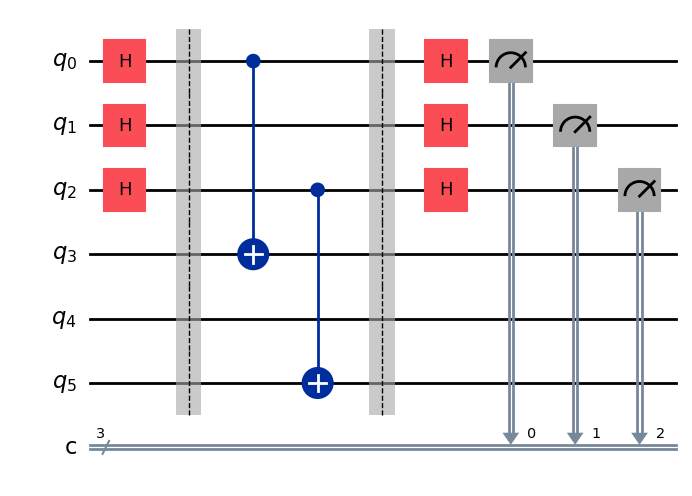

Counts: {'000': 225, '100': 273, '001': 269, '101': 257}


In [19]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from IPython.display import display



## TASK 5: Implement Oracle for the given secret string ##

def create_oracle_for_secret(secret: str) -> QuantumCircuit:
	n = len(secret)
	oracle = QuantumCircuit(2 * n)
	## TODO: Map each secret bit onto a CNOT from the input register to the output register.
	## Code here ##



	return oracle



## TASK 6: Complete Simon algorithm circuit##

def run_simon_algorithm(secret: str = "101") -> tuple[QuantumCircuit, dict[str, int]]:
	"""Run Simon's algorithm for the given secret string and return the measurement counts."""

	n = len(secret) #n is the number qubits involved in the secret!
	circuit = QuantumCircuit(2 * n, n)
	oracle = create_oracle_for_secret(secret)

	# TODO: Make first layer of Hadamards creates a uniform superposition over the inputs.
	## Code here ##




	# TODO: Query the oracle to entangle inputs with the hidden-period function.
	## Code here ##




	# TODO: Implement second Hadamards interfere amplitudes so measurement reveals the secret mask.
	## Code here ##




	# TODO: Measure only the input register; the output register stays unmeasured.
	## Code here ##







	######################DO NOT MODIFY CONTENT BELOW########################################
	simulator = AerSimulator()
	compiled_circuit = transpile(circuit, simulator)
	result = simulator.run(compiled_circuit, shots=1024).result()
	measurement_counts = result.get_counts()
	return circuit, measurement_counts


def display_workshop_report(secret: str, counts: dict[str, int], circuit: QuantumCircuit) -> None:
	"""Mirror earlier templates by summarizing quantum vs classical perspectives."""
	num_qubits = len(secret)
	bitstrings = [format(i, f"0{num_qubits}b") for i in range(2**num_qubits)]
	paired_equations = [key for key in counts if key != "0" * num_qubits]
	paired_equations.sort(key=counts.get, reverse=True)

	def classical_oracle_output(x: str, s: str) -> str:
		return "".join(bit if mask == "1" else "0" for bit, mask in zip(x, s))

	def classical_search() -> dict[str, object]:
		queries = 0
		for candidate in bitstrings:
			if candidate == "0" * num_qubits:
				continue
			match = True
			for x in bitstrings:
				queries += 2
				xor_partner = format(int(x, 2) ^ int(candidate, 2), f"0{num_qubits}b")
				if classical_oracle_output(x, secret) != classical_oracle_output(xor_partner, secret):
					match = False
					break
			if match:
				return {"secret": candidate, "queries_used": queries}
		return {"secret": None, "queries_used": queries}

	def recover_secret(equations: list[str]) -> tuple[str, list[str]]:
		matrix = [list(map(int, eq)) for eq in equations if any(int(bit) for bit in eq)]
		steps: list[str] = []
		row = 0
		for col in range(num_qubits):
			pivot = next((r for r in range(row, len(matrix)) if matrix[r][col] == 1), None)
			if pivot is None:
				continue
			matrix[row], matrix[pivot] = matrix[pivot], matrix[row]
			for r in range(len(matrix)):
				if r != row and matrix[r][col] == 1:
					matrix[r] = [(matrix[r][c] ^ matrix[row][c]) for c in range(num_qubits)]
			steps.append("".join(map(str, matrix[row])))
			row += 1
			if row == num_qubits:
				break
		for candidate in bitstrings:
			if candidate == "0" * num_qubits:
				continue
			if all(sum(int(eq[idx]) * int(candidate[idx]) for idx in range(num_qubits)) % 2 == 0 for eq in equations):
				return candidate, steps
		return "undetermined", steps

	classical_result = classical_search()
	quantum_secret, elimination_steps = recover_secret(paired_equations)

	print("=== Simon's Algorithm Workshop Report ===")
	print("Configured hidden string:", secret)
	print("Quantum measurement counts:", counts)
	print("Independent equations (top {}):".format(min(len(paired_equations), num_qubits - 1)), paired_equations[: max(num_qubits - 1, 0)])
	print("Recovered secret (quantum workflow):\nPlease see the above output:", quantum_secret)
	print("Gaussian elimination trace:", elimination_steps)
	print("Quantum oracle calls (shots):\nPlease see the above output:", sum(counts.values()))
	print("Classical brute-force stats:", classical_result)
	print("\nCircuit diagram:")
	display(circuit.draw('mpl'))
	print("Counts:", counts)


if __name__ == "__main__":
	quantum_circuit, measurement_counts = run_simon_algorithm("101")
	display_workshop_report("101", measurement_counts, quantum_circuit)


https://algassert.com/quirk#circuit={%22cols%22:[[%22Chance6%22],[%22H%22,%22H%22,%22H%22],[%22Chance6%22],[%22%E2%80%A2%22,1,1,%22X%22],[1,1,%22%E2%80%A2%22,1,1,%22X%22],[%22H%22,%22H%22,%22H%22],[%22Chance3%22],[%22Measure%22,%22Measure%22,%22Measure%22],[%22Chance6%22]]}

ANSWER KEY
```
	for index, bit in enumerate(secret):
		if bit == "1":
			oracle.cx(index, index + n)
```

```
		# First layer of Hadamards creates a uniform superposition over the inputs.
	circuit.h(range(n))
	circuit.barrier()
		# Query the oracle to entangle inputs with the hidden-period function.
	circuit.compose(oracle, range(2 * n), inplace=True)
	circuit.barrier()
		# Second Hadamards interfere amplitudes so measurement reveals the secret mask.
	circuit.h(range(n))
		# Measure only the input register; the output register stays unmeasured.
	circuit.measure(range(n), range(n))

```

# Grover search algorithm

In [10]:

import itertools
import math
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from IPython.display import display


def apply_oracle_reflection(circuit: QuantumCircuit, marked_state: str) -> None:
    """Phase-flip the specified marked basis state."""
    n = len(marked_state)
    if circuit.num_qubits < n:
        raise ValueError("Circuit does not provide enough data qubits for the oracle.")

    # Align the marked state so the all-ones multi-controlled Z hits exactly once.
    # Qiskit uses little-endian ordering, so index 0 is the least significant qubit.
    for idx, bit in enumerate(reversed(marked_state)):
        if bit == "0":
            circuit.x(idx)

    # Multi-controlled Z implemented via H-MCX-H on the last qubit to flip the phase.
    circuit.h(n - 1)
    ancilla_qubits = [circuit.qubits[i] for i in range(n, circuit.num_qubits)]
    mcx_kwargs = {}
    if n - 1 > 2:
        mcx_kwargs = {"ancilla_qubits": ancilla_qubits, "mode": "v-chain"}
    circuit.mcx(list(range(n - 1)), n - 1, **mcx_kwargs)
    circuit.h(n - 1)

    # Undo the alignment so the oracle acts as identity on non-marked basis states.
    for idx, bit in enumerate(reversed(marked_state)):
        if bit == "0":
            circuit.x(idx)


def apply_diffusion_reflection(circuit: QuantumCircuit) -> None:
    """Invert amplitudes about their average (diffusion step)."""
    # The diffusion operator acts only on the data qubits (front of the register).
    n = circuit.num_clbits  # equals the number of data qubits we measure.
    if n == 0:
        raise ValueError("Diffusion reflection requires at least one data qubit.")
    # Put the state into the |0...0> basis where the reflection is easy to implement.
    circuit.h(range(n))
    circuit.x(range(n))
    # Phase flip the |0...0> state.
    circuit.h(n - 1)
    ancilla_qubits = [circuit.qubits[i] for i in range(n, circuit.num_qubits)]
    mcx_kwargs = {}
    if n - 1 > 2:
        mcx_kwargs = {"ancilla_qubits": ancilla_qubits, "mode": "v-chain"}
    circuit.mcx(list(range(n - 1)), n - 1, **mcx_kwargs)
    circuit.h(n - 1)
    # Map back to the computational basis after the reflection.
    circuit.x(range(n))
    circuit.h(range(n))


def grover_iteration(circuit: QuantumCircuit, marked_state: str) -> None:
    """Apply one Grover iteration (oracle then diffusion)."""
    apply_oracle_reflection(circuit, marked_state)
    apply_diffusion_reflection(circuit)


def run_grover_search(marked_state: str, shots: int = 1024):
    """Execute Grover's algorithm and return the circuit, counts, iteration count, and ancilla usage."""
    n = len(marked_state)
    controls = n - 1
    ancilla_count = max(0, controls - 2) if controls > 0 else 0
    total_qubits = n + ancilla_count
    circuit = QuantumCircuit(total_qubits, n)

    # Start in the uniform superposition over all basis states.
    circuit.h(range(n))

    # Optimal number of Grover iterations for a single marked element in size 2^n.
    iterations = max(1, int(math.floor((math.pi / 4) * math.sqrt(2 ** n))))
    for _ in range(iterations):
        grover_iteration(circuit, marked_state)

    # Read out each qubit into the matching classical register.
    circuit.measure(range(n), range(n))

    # Simulate the circuit and collect outcome statistics.
    backend = AerSimulator()
    compiled = transpile(circuit, backend)
    result = backend.run(compiled, shots=shots).result()
    counts = result.get_counts()
    ancilla_used = circuit.num_qubits - len(marked_state)

    return circuit, counts, iterations, ancilla_used


def classical_search(marked_state: str):
    """Perform exhaustive classical search to locate the marked bit string."""
    n = len(marked_state)
    # Query each candidate until we match the marked_state.
    for query_count, candidate in enumerate(
        ("".join(bits) for bits in itertools.product("01", repeat=n)), start=1
    ):
        if candidate == marked_state:
            return candidate, query_count
    raise ValueError("Marked state not found in search space.")


if __name__ == "__main__":
    # For the original four-qubit example, set target_state = "1010" and shots = 1024.
    #target_state = "1100101011"
    #shots = 4096
    target_state = "1010"
    shots = 1024

    print(f"Searching for target state: {target_state} (length {len(target_state)} qubits)")

    qc, counts, grover_calls, ancilla_used = run_grover_search(
        marked_state=target_state, shots=shots
    )
    if ancilla_used:
        print(
            f"Additional ancilla qubits employed for multi-controlled gates: {ancilla_used}"
        )
    # Display the measurement distribution and the assembled circuit diagram.
    print("Measurement counts:", counts)
    if counts:
        dominant_state = max(counts, key=counts.get)
        print(
            f"Most frequent measurement outcome: {dominant_state} ({counts[dominant_state]} shots)"
        )
    print(qc.draw())
    # Compare with a classical exhaustive search over the same domain.
    match, queries = classical_search(marked_state=target_state)
    print(f"Classical search located {match} after {queries} oracle calls.")
    # Quantify the oracle-call advantage using expected classical cost.
    data_qubits = len(target_state)
    search_space = 2 ** data_qubits
    classical_expected = search_space / 2
    total_shots = sum(counts.values()) or 1
    success_hits = counts.get(target_state, 0)
    if success_hits == 0 and target_state[::-1] in counts:
        print("Detected reversed bit ordering in counts; using reversed target string for metrics.")
        success_hits = counts[target_state[::-1]]
    success_prob = success_hits / total_shots
    print(
        f"Grover used {grover_calls} oracle calls in a space of {search_space} items "
        f"(≈{classical_expected:.0f} expected classical calls)."
    )
    print(
        f"Expected oracle-call speedup: {classical_expected / grover_calls:.1f}× over classical exhaustive search."
    )
    print(
        f"Observed success probability for the marked state: {success_prob:.3f} with {total_shots} shots."
    )


Searching for target state: 1010 (length 4 qubits)
Additional ancilla qubits employed for multi-controlled gates: 1
Measurement counts: {'0111': 3, '1010': 984, '1111': 3, '0001': 4, '1110': 3, '1101': 1, '1011': 5, '0100': 3, '0010': 3, '0000': 1, '0110': 7, '1000': 3, '0101': 3, '1001': 1}
Most frequent measurement outcome: 1010 (984 shots)
     ┌───┐┌───┐      ┌───┐┌───┐┌───┐           ┌───┐┌───┐┌───┐           ┌───┐»
q_0: ┤ H ├┤ X ├──■───┤ X ├┤ H ├┤ X ├───────■───┤ X ├┤ H ├┤ X ├───────■───┤ X ├»
     ├───┤└───┘  │   ├───┤├───┤└───┘       │   ├───┤├───┤└───┘       │   ├───┤»
q_1: ┤ H ├───────■───┤ H ├┤ X ├────────────■───┤ X ├┤ H ├────────────■───┤ H ├»
     ├───┤┌───┐  │   ├───┤├───┤┌───┐       │   ├───┤├───┤┌───┐       │   ├───┤»
q_2: ┤ H ├┤ X ├──■───┤ X ├┤ H ├┤ X ├───────■───┤ X ├┤ H ├┤ X ├───────■───┤ X ├»
     ├───┤├───┤┌─┴──┐├───┤├───┤├───┤┌───┐┌─┴──┐├───┤├───┤├───┤┌───┐┌─┴──┐├───┤»
q_3: ┤ H ├┤ H ├┤0   ├┤ H ├┤ H ├┤ X ├┤ H ├┤0   ├┤ H ├┤ X ├┤ H ├┤ H ├┤0   ├┤ H ├»
     └───┘└───┘

/tmp/ipython-input-801798200.py:26: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  circuit.mcx(list(range(n - 1)), n - 1, **mcx_kwargs)
/tmp/ipython-input-801798200.py:50: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  circuit.mcx(list(range(n - 1)), n - 1, **mcx_kwargs)
/tmp/ipython-input-8017982

https://algassert.com/quirk#circuit={%22cols%22:[[%22X%22,%22X%22,%22X%22,%22X%22,%22X%22],[%22H%22,%22H%22,%22H%22,%22H%22,%22H%22],[%22Chance5%22],[%22~vn6c%22],[%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22X%22],[%22Chance5%22],[%22~vn6c%22],[%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22X%22],[%22Chance5%22],[%22~vn6c%22],[%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22X%22],[%22Chance5%22],[%22~vn6c%22],[%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22%E2%8A%96%22,%22X%22],[%22Chance5%22]],%22gates%22:[{%22id%22:%22~vn6c%22,%22name%22:%22Oracle%22,%22circuit%22:{%22cols%22:[[%22Z%22,%22%E2%80%A2%22,%22%E2%97%A6%22,%22%E2%80%A2%22,%22%E2%80%A2%22]]}}]}

grover
https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22,%22H%22,%22H%22,%22H%22,%22X%22],[1,1,1,1,%22H%22],[%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22],[1,1,1,1,%22H%22],[%22H%22,%22H%22,%22H%22,%22H%22],[%22X%22,%22X%22,%22X%22,%22X%22],[%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22%E2%80%A2%22,%22Z%22],[%22X%22,%22X%22,%22X%22,%22X%22],[%22H%22,%22H%22,%22H%22,%22H%22]]}

# Qiskit Glossary

https://kevinfreyberg.github.io/Qiskit-Crash-Course/cheat-sheet/